###**1.Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

###**2.Loading Dataset**

In [ ]:
def load_data(file_path, is_train=True):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(' ::: ')
            if is_train:
                data.append({"ID": parts[0], "TITLE": parts[1], "GENRE": parts[2], "DESCRIPTION": parts[3]})
            else:
                data.append({"ID": parts[0], "TITLE": parts[1], "DESCRIPTION": parts[2]})
    return pd.DataFrame(data)

train_data_path = 'train_data.txt'
test_data_path = 'test_data.txt'
train_data = load_data(train_data_path)
test_data = load_data(test_data_path, is_train=False)

In [ ]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [ ]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


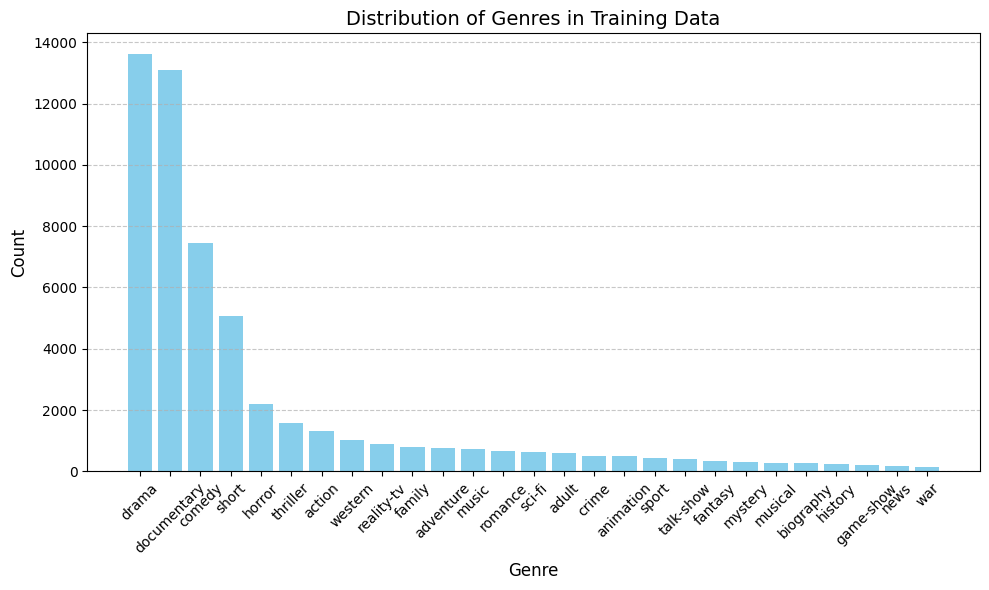

In [ ]:
genre_counts = train_data['GENRE'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Genres in Training Data', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###**2.Data preprocessing**

In [ ]:
train=train_data.dropna()
train=train.drop_duplicates()
print(train)

          ID                                       TITLE        GENRE  \
0          1                Oscar et la dame rose (2009)        drama   
1          2                                Cupid (1997)     thriller   
2          3            Young, Wild and Wonderful (1980)        adult   
3          4                       The Secret Sin (1915)        drama   
4          5                      The Unrecovered (2007)        drama   
...      ...                                         ...          ...   
54209  54210                             "Bonino" (1953)       comedy   
54210  54211                 Dead Girls Don't Cry (????)       horror   
54211  54212   Ronald Goedemondt: Ze bestaan echt (2008)  documentary   
54212  54213                    Make Your Own Bed (1944)       comedy   
54213  54214  Nature's Fury: Storm of the Century (2006)      history   

                                             DESCRIPTION  
0      Listening in to a conversation between his doc...  
1    

In [ ]:
test=test_data.dropna()
test=test.drop_duplicates()
print(test)

          ID                           TITLE  \
0          1            Edgar's Lunch (1998)   
1          2        La guerra de papá (1977)   
2          3     Off the Beaten Track (2010)   
3          4          Meu Amigo Hindu (2015)   
4          5               Er nu zhai (1955)   
...      ...                             ...   
54195  54196  "Tales of Light & Dark" (2013)   
54196  54197     Der letzte Mohikaner (1965)   
54197  54198             Oliver Twink (2007)   
54198  54199               Slipstream (1973)   
54199  54200       Curitiba Zero Grau (2010)   

                                             DESCRIPTION  
0      L.R. Brane loves his life - his car, his apart...  
1      Spain, March 1964: Quico is a very naughty chi...  
2      One year in the life of Albin and his family o...  
3      His father has died, he hasn't spoken with his...  
4      Before he was known internationally as a marti...  
...                                                  ...  
54195  Cov

###**3.Vectorizing the dataset**

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(train_data['DESCRIPTION'])
y = train_data['GENRE']

###**4.Splitting the dataset**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

###**4.Training the model**

In [ ]:
print("\nTraining Naive Bayes...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


Training Naive Bayes...


MultinomialNB()

###**5.Predicting & Evaluating the model**

In [ ]:
y_pred = nb_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"\nNaive Bayes Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_pred))



Naive Bayes Accuracy: 0.5231


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.57      0.08      0.14       263
       adult       0.88      0.06      0.12       112
   adventure       0.29      0.03      0.05       139
   animation       0.00      0.00      0.00       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.44      0.47      1443
       crime       0.00      0.00      0.00       107
 documentary       0.58      0.88      0.70      2659
       drama       0.46      0.83      0.59      2697
      family       1.00      0.01      0.01       150
     fantasy       0.00      0.00      0.00        74
   game-show       1.00      0.15      0.26        40
     history       0.00      0.00      0.00        45
      horror       0.73      0.38      0.50       431
       music       0.79      0.10      0.18       144
     musical       0.00      0.00      0.00        50
     mystery       0.00      0.00      0.00        56
        news       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
X_test = vectorizer.transform(test_data['DESCRIPTION'])
test_data['PREDICTED_GENRE'] = nb_classifier.predict(X_test)

In [ ]:
output_file = 'test_predictions.csv'
test_data[['ID', 'PREDICTED_GENRE']].to_csv(output_file, index=False)

In [ ]:
print(f"Predictions successfully saved to {output_file}")

Predictions successfully saved to test_predictions.csv


In [ ]:
user_description = input("Enter the movie description to predict its genre: ")
user_description_transformed = vectorizer.transform([user_description])
predicted_genre = nb_classifier.predict(user_description_transformed)
print(f"The predicted genre for the provided description is: {predicted_genre}")

Enter the movie description to predict its genre: A clumsy but lovable waiter gets entangled in a series of hilarious misadventures while trying to impress his crush. From accidental spills to outrageous misunderstandings, every situation spirals into a laugh-out-loud moment, leaving everyone in stitches
The predicted genre for the provided description is: ['comedy']
